## Importação

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/liliansom/ML_CustomerSatisfaction/main/data/Invistico_Airline.csv'
data = pd.read_csv(url)

In [3]:
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


## Análise dos Dados

In [4]:
data.shape

(129880, 23)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [6]:
data.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

### Análise das Entradas por Coluna

In [7]:
#imputing mean for missing values 
data['Arrival Delay in Minutes'].fillna((round(data['Arrival Delay in Minutes'].mean(),0)), inplace=True)

In [8]:
counts_type_travel = data['Type of Travel'].value_counts()
counts_type_travel

Type of Travel
Business travel    89693
Personal Travel    40187
Name: count, dtype: int64

In [9]:
count_customer_type = data['Customer Type'].value_counts()
count_customer_type

Customer Type
Loyal Customer       106100
disloyal Customer     23780
Name: count, dtype: int64

In [10]:
count_travel_type = data['Type of Travel'].value_counts()
count_travel_type

Type of Travel
Business travel    89693
Personal Travel    40187
Name: count, dtype: int64

In [11]:
count_class = data['Class'].value_counts()
count_class

Class
Business    62160
Eco         58309
Eco Plus     9411
Name: count, dtype: int64

### Transformação dos dados para binário

In [12]:
# Class needs to be int (0=Business; 1=Eco, 2=Eco Plus)
data.loc[data['Class'] == 'Business', 'Class'] = '0'
data.loc[data['Class'] == 'Eco', 'Class'] = '1'
data.loc[data['Class'] == 'Eco Plus', 'Class'] = '2'

In [13]:
# Satisfaction needs to be binary (0=dissatisfied; 1=satisfied)
data.loc[data['satisfaction'] == 'satisfied', 'satisfaction'] = '1'
data.loc[data['satisfaction'] == 'dissatisfied', 'satisfaction'] = '0'

In [14]:
# Gender needs to be binary (0=female; 1=male)
data.loc[data['Gender'] == 'Female', 'Gender'] = '0'
data.loc[data['Gender'] == 'Male', 'Gender'] = '1'

In [15]:
# Customer Type needs to be binary (0=Loyal; 1=Disloyal)
data.loc[data['Customer Type'] == 'Loyal Customer', 'Customer Type'] = '0'
data.loc[data['Customer Type'] == 'disloyal Customer', 'Customer Type'] = '1'

In [16]:
# Travel Type needs to be binary (0=Business travel; 1=Personal Travel)
data.loc[data['Type of Travel'] == 'Business travel', 'Type of Travel'] = '0'
data.loc[data['Type of Travel'] == 'Personal Travel', 'Type of Travel'] = '1'
data['Type of Travel'].value_counts()

Type of Travel
0    89693
1    40187
Name: count, dtype: int64

### Estatísticas Descritivas

In [17]:
data.describe().round(2)

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00
mean,39.43,1981.41,2.84,2.99,2.85,2.99,3.25,3.38,3.52,3.47,3.47,3.49,3.70,3.34,3.71,3.35,14.71,15.09
std,15.12,1027.12,1.39,1.53,1.44,1.31,1.32,1.35,1.31,1.31,1.27,1.29,1.16,1.26,1.15,1.30,38.07,38.41
min,7.00,50.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,27.00,1359.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,3.00,2.00,3.00,3.00,3.00,2.00,0.00,0.00
50%,40.00,1925.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,4.00,0.00,0.00
75%,51.00,2544.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,5.00,4.00,5.00,5.00,4.00,5.00,4.00,12.00,13.00
max,85.00,6951.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1592.00,1584.00


In [18]:
# Analyzing correlations between variables
data_corr = data.corr().round(4)
data_corr

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
satisfaction,1.0000,-0.2122,-0.2926,0.1180,-0.1092,-0.2789,-0.0392,0.2424,-0.0155,0.1207,...,0.3901,0.4318,0.3520,0.3049,0.2603,0.2662,0.2593,0.3381,-0.0739,-0.0806
Gender,-0.2122,1.0000,-0.0310,0.0090,0.0095,-0.0116,0.1206,-0.0721,0.0522,-0.0592,...,-0.0901,-0.0821,-0.0571,-0.0713,-0.0171,-0.0185,-0.0150,-0.0474,0.0035,0.0013
Customer Type,-0.2926,-0.0310,1.0000,-0.2842,-0.3082,0.0430,0.0189,-0.0428,-0.1861,-0.0487,...,-0.1862,-0.1497,-0.0854,-0.0972,-0.0006,-0.0444,-0.0023,-0.1064,0.0039,0.0047
Age,0.1180,0.0090,-0.2842,1.0000,-0.0448,-0.1169,-0.2496,0.0088,0.0391,0.0157,...,0.1212,0.0716,0.0667,0.0838,-0.0155,0.0318,-0.0183,0.0380,-0.0090,-0.0112
Type of Travel,-0.1092,0.0095,-0.3082,-0.0448,1.0000,0.4867,-0.1228,0.0168,0.1915,-0.0318,...,-0.0394,-0.0258,0.0359,0.0139,0.0484,0.0573,0.0584,-0.0094,-0.0059,-0.0058
Class,-0.2789,-0.0116,0.0430,-0.1169,0.4867,1.0000,-0.1541,0.0350,0.0545,-0.0422,...,-0.1685,-0.1217,-0.1654,-0.1253,-0.1291,-0.1382,-0.1225,-0.0939,0.0095,0.0141
Flight Distance,-0.0392,0.1206,0.0189,-0.2496,-0.1228,-0.1541,1.0000,-0.0424,0.0014,-0.0046,...,-0.0320,-0.0223,-0.0326,-0.0303,0.0198,0.0025,0.0094,0.0096,0.1126,0.1099
Seat comfort,0.2424,-0.0721,-0.0428,0.0088,0.0168,0.0350,-0.0424,1.0000,0.4350,0.7160,...,0.1203,0.2115,0.1211,0.1361,0.1185,0.0412,0.1085,0.1304,-0.0238,-0.0255
Departure/Arrival time convenient,-0.0155,0.0522,-0.1861,0.0391,0.1915,0.0545,0.0014,0.4350,1.0000,0.5274,...,-0.0005,0.0018,0.0604,0.0294,0.0674,0.0628,0.0671,-0.0006,0.0044,0.0026
Food and drink,0.1207,-0.0592,-0.0487,0.0157,-0.0318,-0.0422,-0.0046,0.7160,0.5274,1.0000,...,0.0286,0.0412,0.0386,0.0742,0.0364,0.0119,0.0334,0.0136,-0.0134,-0.0149


In [19]:
# Data Correlation satisfaction x variables
data_corr = data.corr().round(4)
data_corr = data_corr.iloc[:, 0].sort_values(ascending=False)
data_corr

satisfaction                         1.0000
Inflight entertainment               0.5235
Ease of Online booking               0.4318
Online support                       0.3901
On-board service                     0.3520
Online boarding                      0.3381
Leg room service                     0.3049
Checkin service                      0.2662
Baggage handling                     0.2603
Cleanliness                          0.2593
Seat comfort                         0.2424
Inflight wifi service                0.2271
Food and drink                       0.1207
Age                                  0.1180
Gate location                       -0.0121
Departure/Arrival time convenient   -0.0155
Flight Distance                     -0.0392
Departure Delay in Minutes          -0.0739
Arrival Delay in Minutes            -0.0806
Type of Travel                      -0.1092
Gender                              -0.2122
Class                               -0.2789
Customer Type                   

#### Interpretação do Coeficiente de correlação de Pearson

0.9 para mais ou para menos indica uma correlação muito forte.

0.7 a 0.9 positivo ou negativo indica uma correlação forte.

0.5 a 0.7 positivo ou negativo indica uma **correlação moderada**.

* Positive
        
        Inflight entertainment               0.5235

0.3 a 0.5 positivo ou negativo indica uma **correlação fraca**.

* Positive
        
        Ease of Online booking               0.4318
        Online support                       0.3901
        On-board service                     0.3520
        Online boarding                      0.3381
        Leg room service                     0.3049

* Negative

        Customer Type                       -0.2926
        
0 a 0.3 positivo ou negativo indica uma correlação desprezível.

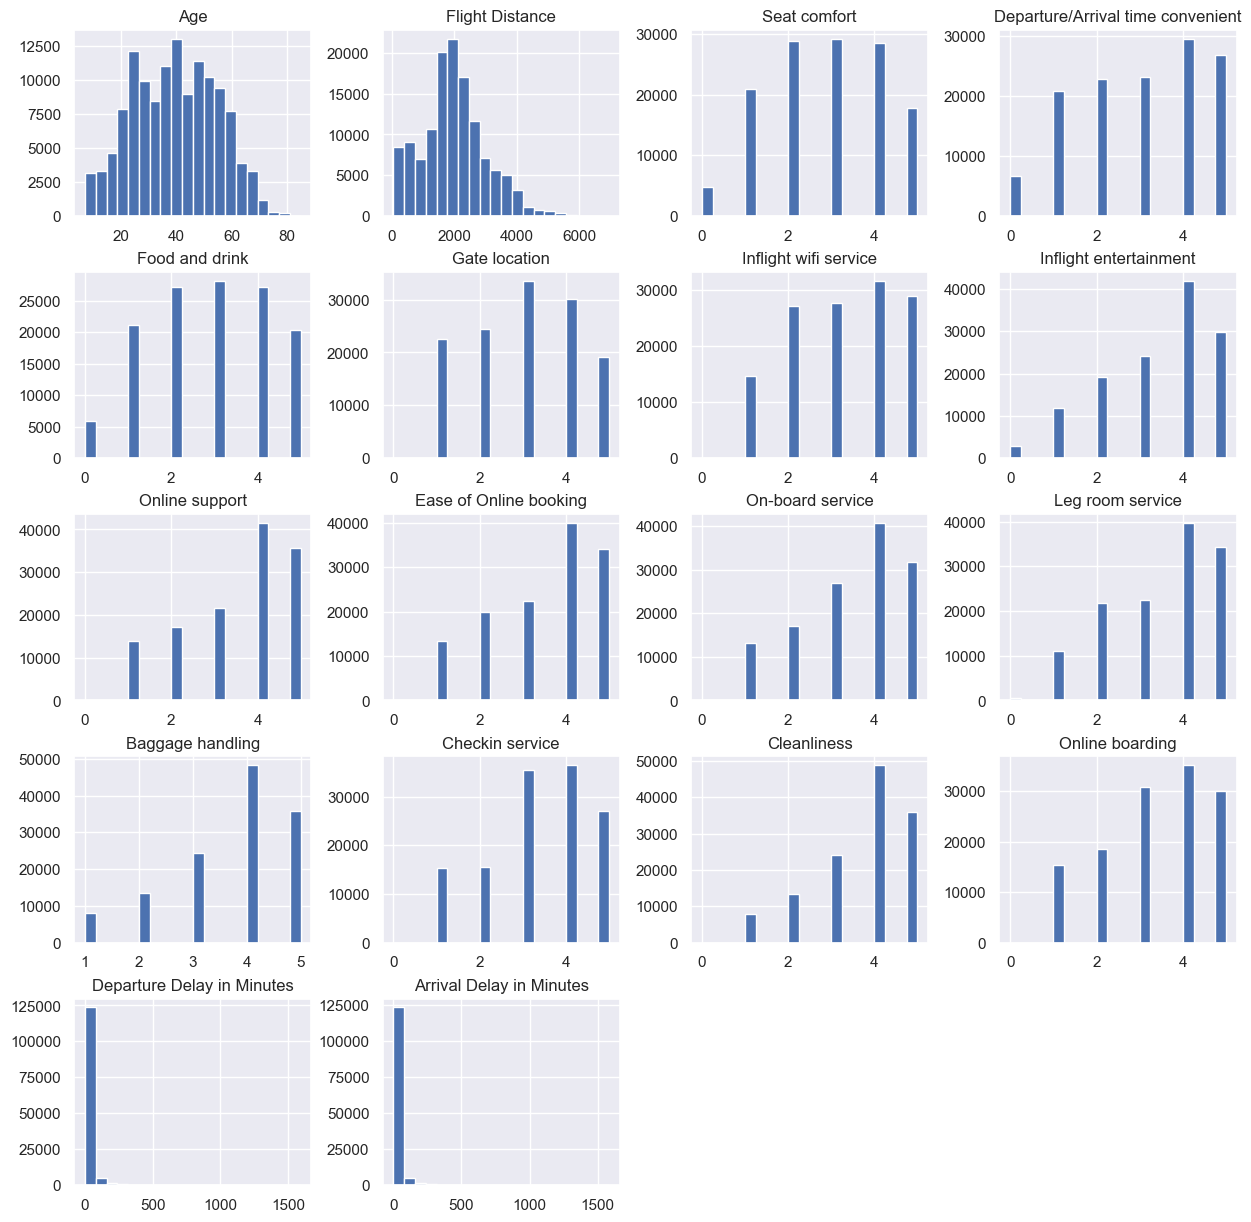

In [20]:
sns.set(font_scale=1.0, rc={'figure.figsize': (15,15)})
axis = data.hist(bins=20)

In [21]:
data.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

Text(0.5, 1.0, 'Boxplot Inflight Entertainment')

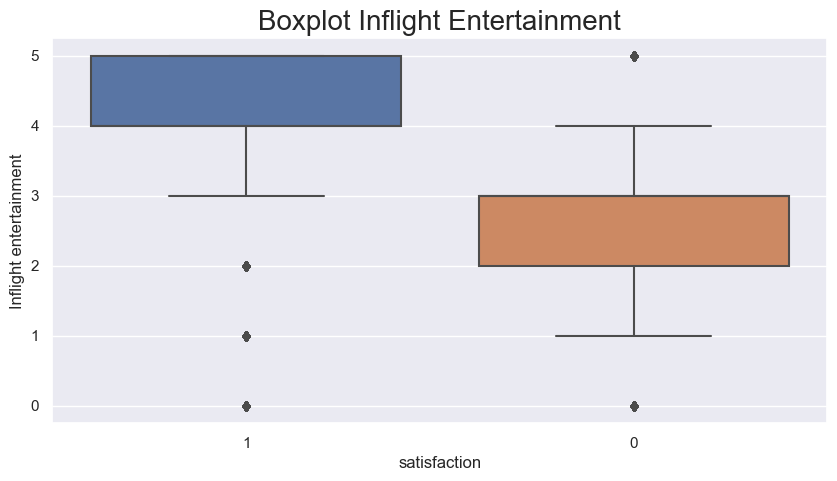

In [22]:
plt.figure(figsize=(10,5))

ax = sns.boxplot(data=data, x='satisfaction', y='Inflight entertainment')
ax.set_title('Boxplot Inflight Entertainment', fontsize=20)

Text(0.5, 1.0, 'Boxplot Ease of Online booking')

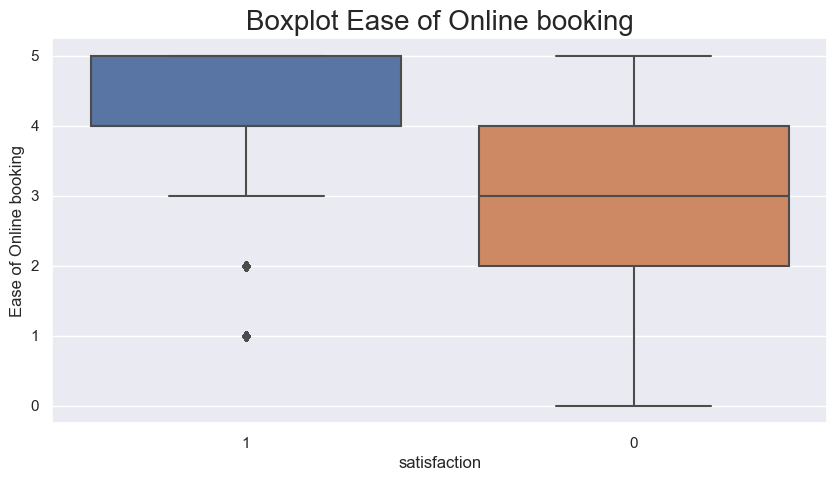

In [23]:
plt.figure(figsize=(10,5))

ax = sns.boxplot(data=data, x='satisfaction', y='Ease of Online booking')
ax.set_title('Boxplot Ease of Online booking', fontsize=20)

Text(0.5, 1.0, 'Boxplot Checkin Service')

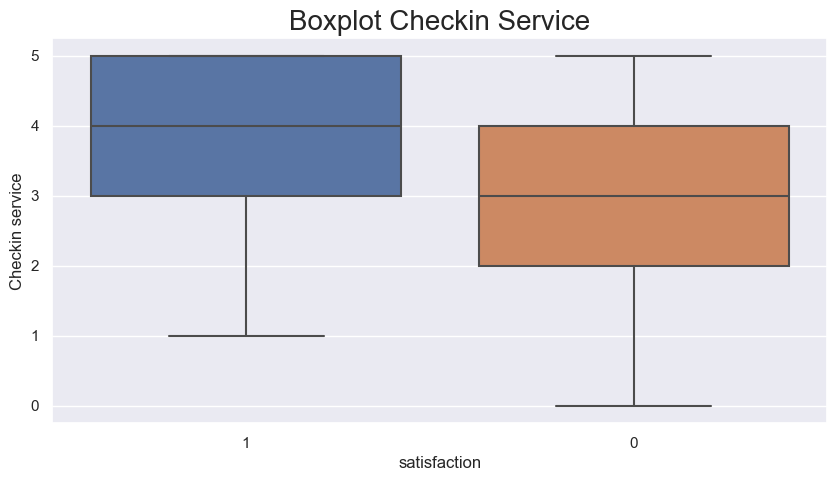

In [24]:
plt.figure(figsize=(10,5))

ax = sns.boxplot(data=data, x='satisfaction', y='Checkin service')
ax.set_title('Boxplot Checkin Service', fontsize=20)

Text(0.5, 1.0, 'Boxplot Board Service')

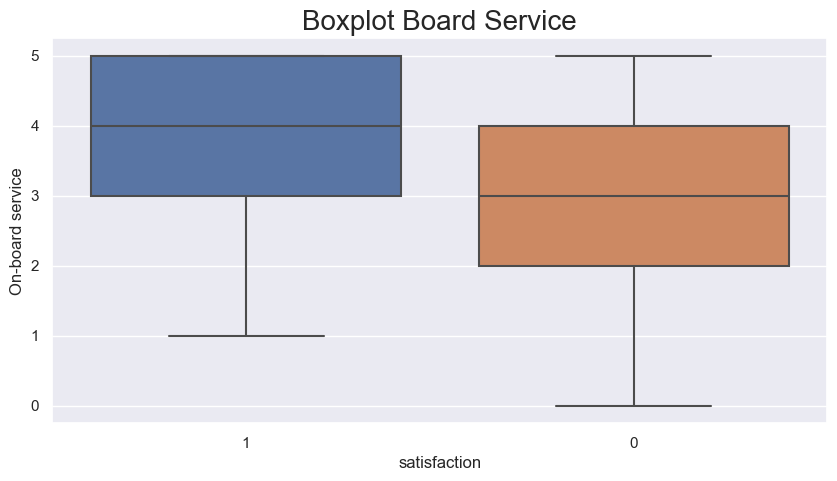

In [25]:
plt.figure(figsize=(10,5))

ax = sns.boxplot(data=data, x='satisfaction', y='On-board service')
ax.set_title('Boxplot Board Service', fontsize=20)

In [26]:
data.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [27]:
"""plt.figure(figsize=(5,5))
sns.pairplot(data, y_vars='satisfaction', x_vars=['Inflight entertainment', 
                                                   'Ease of Online booking', 
                                                   'On-board service', 
                                                   'Online boarding', 
                                                   'Leg room service', 
                                                   'Customer Type'], 
             height=5)"""

"plt.figure(figsize=(5,5))\nsns.pairplot(data, y_vars='satisfaction', x_vars=['Inflight entertainment', \n                                                   'Ease of Online booking', \n                                                   'On-board service', \n                                                   'Online boarding', \n                                                   'Leg room service', \n                                                   'Customer Type'], \n             height=5)"

In [31]:
data.to_csv('data/Invistico_Airline_treated.csv')